## Generality

EM algorithm is a soft (probabilistic) clustering algorithm. Here we describe the theory and its application for Gaussian mixtures (2D and finite number of Gaussians) with a code implementation. Suppose we obtain a data set ${y_{i}}_{i=1}^{N}$. We suspect that they were generated by some hyperparameters ${\Theta}$ with marginalized continuous parameters ${\alpha}$.

$$\begin{align}
    p(y_{i}|\Theta) \quad & = & \int d\alpha_{i} \, p(y_{i}|\alpha_{i}) p(\alpha_{i}|\Theta)  \quad \quad (\alpha\, : \, continuous)\\
    p(y_{i}|\Theta) \quad & = & \sum_{\alpha_{i}} p(y_{i}|\alpha_{i}) p(\alpha_{i}|\Theta)  \quad \quad (\alpha \, : \, discrete)
\end{align}$$

In the following, we consider the continuous case and notice the joint probability $p(y_{i}|\alpha_{i}) p(\alpha_{i}|\Theta) = p(y_{i}, \alpha_{i}|\Theta)$.

$$\begin{align}
L \quad & = & \quad \prod_{i=1}^{N} p(y_{i}|\Theta) \qquad = \qquad \prod_{i=1}^{N} \Big[ \int d\alpha_{i} \, p(y_{i}, \alpha_{i}|\Theta)\Big]
\end{align}$$

It is more convenient to consider the log likelihood $log(L)$ to perform the maximum likelihood estimation for $\hat\Theta$.

$$\begin{align}
\hat{\Theta}\quad & = &\quad argmax_{\Theta}\quad \sum_{i=1}^{N} log  \, p(y_{i}|\Theta)\\
& = & argmax_{\Theta}\quad \sum_{i=1}^{N} log\Big[ \int d\alpha_{i} \, p(y_{i}, \alpha_{i}|\Theta)\Big]
\end{align}$$

For a convecx function as log, Jensen's theorem holds. By multiplying and dividing the integrand by $q(\alpha_{i})$, we can apply the Jensen's theorem. The following is true for any  $\Theta$.

$$\begin{align}
\sum_{i=1}^{N} log \Big[ \int d\alpha_{i} \, p(y_{i}, \alpha_{i}|\Theta)\Big] \quad
& \ge &  \sum_{i=1}^{N} \int d\alpha_{i} \, q(\alpha_{i})\,log\,\bigg[  \frac{p(y_{i}, \alpha_{i}|\Theta)}{q(\alpha_{i})}\bigg]
\end{align}$$

Define the right hand side as lower bound function $B(\Theta, \{\alpha\})$. What we would like to obtain is 

$$\begin{align}
\{\hat{\alpha}_{i}\} \quad & = &\quad argmax_{\{\alpha\}}\quad B(\Theta, \{\alpha_{i}\})
\end{align}$$

$$\begin{align}
\hat{\Theta} \quad & = &\quad argmax_{\Theta}\quad B(\Theta, \{\alpha_{i}\})
\end{align}$$

The strategy of the EM algorithm is to iteratively solve these equations by two steps of optimizations (maximizations) for $\{\alpha_{i}\}$ and $\Theta$ respectively. At $n$th iteration, suppose we've obtained $\Theta_{n}$ and $\{\alpha\}_{n}$ from $n-1$ th iteration.

E-step:
$$\begin{align}
\{\alpha_{i}\}_{n + 1} \quad & = &\quad argmax_{\{\alpha\}_{n}}\quad B(\Theta_{n}, \{\alpha_{i}\}_{n})
\end{align}$$

M-step:
$$\begin{align}
\Theta_{n + 1}
 \quad & = &\quad argmax_{\Theta_{n}}\quad B(\Theta_{n}, \{\alpha_{i}\}_{n+1})
\end{align}$$


As can be seen, 
The lower bound function for the likelihood reads
$$\begin{align}
B(\Theta, \{\alpha_{i}\}) \quad & = &\quad \sum_{i=1}^{N} \int d\alpha_{i} \, q_{i}(\alpha_{i})\,log\,\bigg[  \frac{p(\alpha_{i}|y_{i}, \Theta)p(y_{i}|\Theta)}{q_{i}(\alpha_{i})}\bigg]\\
& = & \quad \sum_{i=1}^{N} \int d\alpha_{i} \, q_{i}(\alpha_{i})\,log\,p(y_{i}|\Theta) \quad +\quad  \sum_{i=1}^{N} \int d\alpha_{i} \, q_{i}(\alpha_{i})\,log\,\bigg[  \frac{p(\alpha_{i}|y_{i}, \Theta)}{q_{i}(\alpha_{i})}\bigg]\\
& = & \quad \sum_{i=1}^{N} log\,p(y_{i}|\Theta) \quad +\quad \sum_{i=1}^{N} \int d\alpha_{i} \, q_{i}(\alpha_{i})\,log\,\bigg[  \frac{p(\alpha_{i}|y_{i}, \Theta)}{q_{i}(\alpha_{i})}\bigg]
\end{align}$$

The first term is $\alpha_{i}$-independent part and the second term is $\alpha_{i}$-dependent, which is called Kullback-Leibler divergence between $p(\alpha_{i}|y_{i}, \Theta)$ and $q(\alpha_{i})$. One can show that the second term is negative or equal to zero. Namely, the maximum value of the second term is zero, which is satisfied only if $q_{i}(\alpha_{i}) = p(\alpha_{i}|y_{i}, \Theta_{n})$ as seee in $log \frac{p(\alpha_{i, n+1}|y_{i}, \Theta)}{p(\alpha_{i, n+1}|y_{i}, \Theta)} = log(1) = 0$. Therefore, after the $n$th E-step,

$$\begin{align}
B(\Theta_{n}, \{\alpha_{i}\}_{n+1}) \quad & = &\quad \sum_{i=1}^{N} log\,p(y_{i}|\Theta_{n})
\end{align}$$

is achieved. Notice that $\Theta_{n}$ is not necessarily yet fully optimized to $\hat{\Theta}$. However, we have an issue here. We started the EM algorithm as it is difficult to directly optimize $log\,p(y_{i}|\Theta)$ with respect to $\Theta$. Also, once we start tuning $\Theta_{n}$, $q_{i}(\alpha_{i}) = p(\alpha_{i}|y_{i}, \Theta_{n})$ would not be satisfied any more. Therefore, for the M-step, we have to maximize $B(\Theta_{n}, \{\alpha_{i}\}_{n+1})$ directly. In conclusion, the EM algorithm interates the following two steps until the changes in the parameters become negligible.
<br>

E-step: 
$$\begin{align}
\{\alpha_{i}\}_{n + 1} \quad & = &\quad p(\alpha_{i, n}|y_{i}, \Theta_{n})
\end{align}$$
<br>
M-step:
$$\begin{align}
\Theta_{n + 1}  \quad & = &\quad argmax_{\Theta_{n}}\quad \sum_{i=1}^{N} \int d\alpha_{i, n+1} \, q(\alpha_{i, n+1})\,log\,p(y_{i}, \alpha_{i, n + 1}|\Theta_{n})
\end{align}$$

The E-step calculates the posterior of $\alpha_{i}$ given $y_{i}$ and $\Theta_{n}$. For the M-step, we have dropped $q(\alpha_{i, n+1})logq(\alpha_{i, n+1})$ as it does not depend on $\Theta$.
<br>
<br>

## Gaussian Mixture (finite mixture)




##  Implementation of Gaussian Mixture (finite mixture, 2D)

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [132]:
# this function outputs an covariance matrices avoiding generating too much squashed ellipses
def generate_nice_covariance_for_ellipse(k):
    sg = np.zeros((k, 2, 2))
    for i in range(k):
        eig = 2*np.random.rand(2) + 0.5 # adding 0.2 and normalize to avoid generating smashed ellipses
        ang = np.pi * np.random.rand(1) # in radian
        c, s = np.cos(ang), np.sin(ang)
        rot = np.matrix(np.asarray([[c, s], [-s, c]]))
        pax = np.eye(2) * eig # axes of ellipes
        sgrt = np.dot(rot, pax)
        sg[i] = np.dot(sgrt, sgrt.T)
    return sg

In [101]:
# this function outputs an elliptic contour of a Gaussian based on its mu and sg.
def contour_ellipse(mu, sg):
    theta = np.linspace(0,2*np.pi, 100)
    eg, egv = np.linalg.eig(sg) # eigen values/vectors of the covariant matrices
    elp_orig = np.vstack((eg[0] * np.cos(theta), eg[1] * np.sin(theta))) 
    elp_rot = np.dot(egv, elp_orig) # rotate the ellipse
    elp = mu[:,np.newaxis] + elp_rot # translate the ellipse
    return elp

In [272]:
dim = 2    # dimension of the problem. Suppose we work on a 2D problem.
nm = 3     # number of mixed gaussian. Here, we set it to 3.
ns = 300  # number of samples

In [275]:
mu = 10 * np.random.rand(nm, dim)             # mean
sg = generate_nice_covariance_for_ellipse(nm)  # this is to ensure the positive-definiteness of the sigma
lm = np.random.rand(nm) + 0.1           # lambda : ratio of the mixture. 0.1 is to make sure it won't generate too tiny weight
lm /= lm.sum()
lm_ind = np.round(np.cumsum(lm) * ns).astype(int)
lm_ind = np.insert(lm_ind, 0, 0)

L_true -2.47738423792


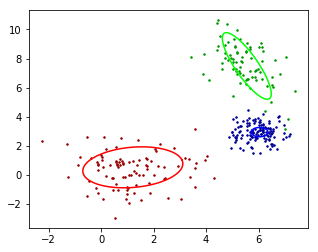

In [276]:
smp = np.zeros((dim, ns))
gs_true = np.zeros(ns)
%matplotlib inline
clrs1 = [(0.6, 0, 0), (0, 0.6, 0), (0, 0, 0.6)]
clrs2 = [(1, 0, 0), (0, 1, 0), (0, 0, 1)]
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots

for i in range(nm):
    smp[:, lm_ind[i]:lm_ind[i+1]] = np.random.multivariate_normal\
                                    (mu[i], sg[i], lm_ind[i+1] - lm_ind[i]).T
    gs_true[lm_ind[i]:lm_ind[i+1]] = multivariate_normal(mu[i], sg[i]).pdf(smp[:, lm_ind[i]:lm_ind[i+1]].T)
    plt.plot(smp[0, lm_ind[i]:lm_ind[i+1]], smp[1, lm_ind[i]:lm_ind[i+1]], '.', markersize=3, color=clrs1[i]) #
    elp = contour_ellipse(mu[i], sg[i])
    plt.plot(elp[0], elp[1], color=clrs2[i], ls='-')

L_true = np.log(gs_true).sum() / ns
print('L_true', L_true)

We have now generated a data set to apply EM algorithm.

In [280]:
mue = 10 * np.random.rand(nm, dim)             # initial mean (to be Estimated)
sge = generate_nice_covariance_for_ellipse(nm) # initial std  (to be Estimated)
lme = np.random.rand(nm)
lme /= lme.sum()                      # initial mixture ratio (to be Estimated)

L_infer = -6.740701 , L_true = -2.477384
L_infer = -4.689185 , L_true = -2.477384
L_infer = -4.000916 , L_true = -2.477384
L_infer = -3.938775 , L_true = -2.477384
L_infer = -3.917224 , L_true = -2.477384
L_infer = -3.897588 , L_true = -2.477384
L_infer = -3.875433 , L_true = -2.477384
L_infer = -3.842641 , L_true = -2.477384
L_infer = -3.791314 , L_true = -2.477384
L_infer = -3.719111 , L_true = -2.477384
L_infer = -3.640635 , L_true = -2.477384
L_infer = -3.560497 , L_true = -2.477384


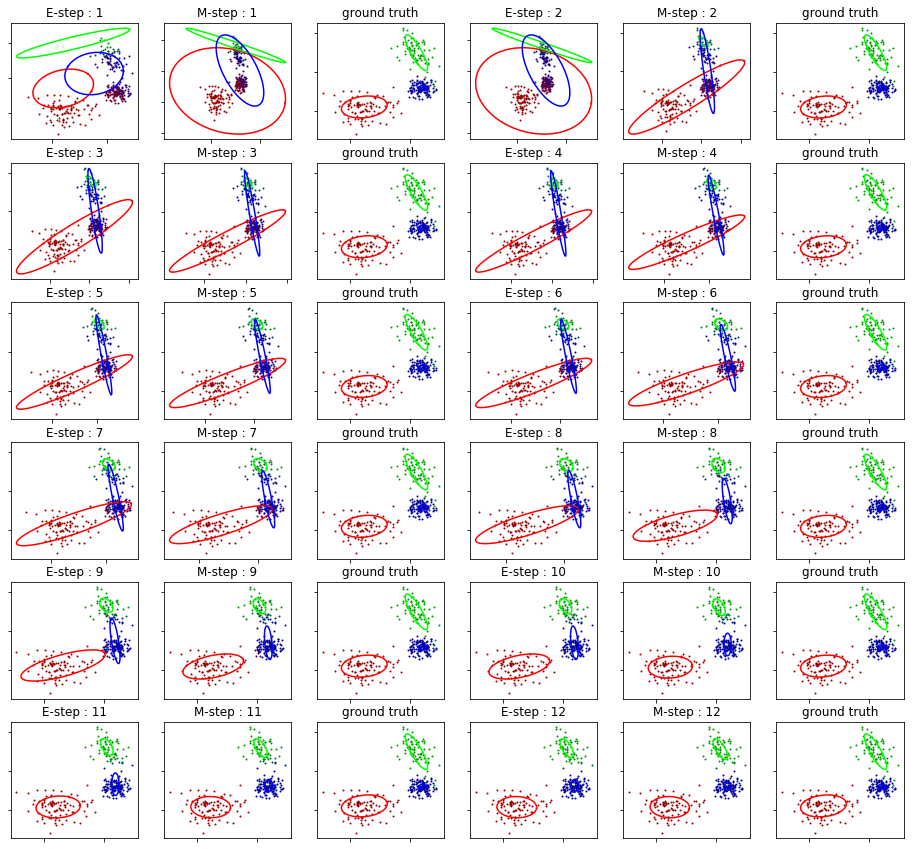

In [281]:
Nrep = 12
plt.rcParams['figure.figsize'] = (16.0, 15.0) # set default size of plots
clr = 0.6
clrs = [(1, 0, 0), (0, 1, 0), (0, 0, 1)]

for rep in range(Nrep):
    gs = np.zeros((nm, ns))
    for i in range(nm):
        gs[i, :] = lme[i] * multivariate_normal(mue[i], sge[i]).pdf(smp.T)
    
    # E-step
    r = gs / gs.sum(axis=0)
    # plot the update
    ax = plt.subplot(Nrep/2, 6, 1 + 3 * rep)
    for i in range(ns):
        plt.plot(smp[0, i], smp[1, i], '.', color=(clr*r[0, i], clr*r[1, i], clr*r[2, i]), markersize=2)
    for i, c in zip(range(nm), clrs):
        elp = contour_ellipse(mue[i], sge[i])
        plt.plot(elp[0], elp[1], color=c, ls='-')
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_title('E-step : %d' % (rep + 1))
        
    # M-step
    lme = r.sum(axis=1)/r.sum()
    for i in range(nm):
        dlts = smp - mue[i][:, np.newaxis]
        sge[i] = np.dot((r[i] * dlts), dlts.T) / r[i].sum()
        mue[i] = (r[i] * smp).sum(axis=1) / r[i].sum()
    # plot the update
    ax = plt.subplot(Nrep/2, 6, 1 + 3 * rep + 1)
    for i in range(ns):
        plt.plot(smp[0, i], smp[1, i], '.', color=(clr*r[0, i], clr*r[1, i], clr*r[2, i]), markersize=2)
    for i, c in zip(range(nm), clrs):
        elp = contour_ellipse(mue[i], sge[i])
        plt.plot(elp[0], elp[1], color=c, ls='-')
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_title('M-step : %d' % (rep + 1))
        
    # plot the ground truth
    ax = plt.subplot(Nrep/2, 6, 1 + 3 * rep + 2)
    for i, c in zip(range(nm), clrs):
        plt.plot(smp[0, lm_ind[i]:lm_ind[i+1]], smp[1, lm_ind[i]:lm_ind[i+1]], '.', markersize=2, color=clrs1[i]) #
        elp = contour_ellipse(mu[i], sg[i])
        plt.plot(elp[0], elp[1], color=clrs2[i], ls='-')
        ax.set_title('ground truth')
        ax.set_yticklabels([])
        ax.set_xticklabels([])


    L_infer = np.log(gs.sum(axis=0)).sum() / ns
    print('L_infer = %2.6f , L_true = %2.6f' % (L_infer, L_true))
    
